# Aριθμητική Ανάλυση - 1ο Σετ 
## Κουρτέσης Δημήτρης - ΑΕΜ:15754

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import scienceplots # pip install scienceplots
plt.style.use(["science", "notebook", "grid"])
plt.rcParams["text.usetex"] = True

### Άσκηση 1:

α) Να βρεθεί η ρίζα της εξίσωσης,
$$2x+3sin\left(4x\right)-e^{x}=0,$$
θεωρώντας ως αρχικό διάστημα το $\left[0.5, 1\right]$ με τη μέθοδο της διχοτόμησης και με ακρίβεια δύο δεκαδικών ψηφίων.

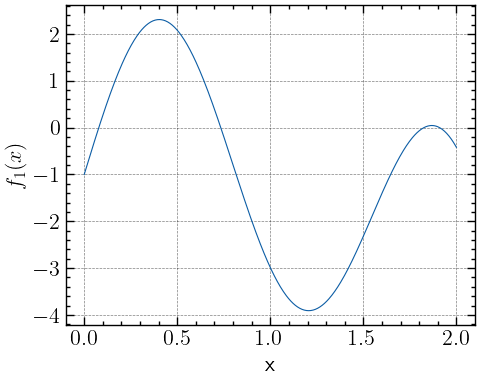

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

x = np.linspace(0, 2, 500)

def f1(x):
    return 2*x + 3*np.sin(4*x) -np.exp(x)

ax.plot(x, f1(x))
ax.set_xlabel("x") ; ax.set_ylabel(r"$f_{1}(x)$") ; plt.rcParams["lines.linewidth"] = 0.8
plt.show()

In [3]:
x0 = 0.5 ; x1 = 1.0

iteration1 = []
solution1 = []

for i in range(0, 1000):
    mu0 = (x0 + x1) / 2
    
    iteration1.append(i+1)
    solution1.append(mu0)
    print(str(iteration1[i]) + ". f(%.12f)="%solution1[i] + "%.12f\n"%f1(solution1[i]))
    
    if np.abs(f1(mu0)) < 10**(-12): # Ψάχνουμε λύση πολύ κοντά στο μηδέν.
        if i>=2 and (solution1[i] - solution1[i-1]) <= 10**(-2):
            break # Ακρίβεια έως και 2 δεκαδικά ψηφία.
    elif f1(x0)*f1(mu0) < 0: 
        x1 = mu0
    elif f1(x1)*f1(mu0) < 0: 
        x0 = mu0

print("ρ=%.2f"%solution1[len(solution1)-1])

1. f(0.750000000000)=-0.193639992433

2. f(0.625000000000)=1.177170474880

3. f(0.687500000000)=0.531245506575

4. f(0.718750000000)=0.175971206602

5. f(0.734375000000)=-0.007392787213

6. f(0.726562500000)=0.084693858053

7. f(0.730468750000)=0.038746190013

8. f(0.732421875000)=0.015699924432

9. f(0.733398437500)=0.004159287911

10. f(0.733886718750)=-0.001615330640

11. f(0.733642578125)=0.001272334740

12. f(0.733764648438)=-0.000171409093

13. f(0.733703613281)=0.000550485059

14. f(0.733734130859)=0.000189543539

15. f(0.733749389648)=0.000009068612

16. f(0.733757019043)=-0.000081169893

17. f(0.733753204346)=-0.000036050554

18. f(0.733751296997)=-0.000013490949

19. f(0.733750343323)=-0.000002211163

20. f(0.733749866486)=0.000003428726

21. f(0.733750104904)=0.000000608782

22. f(0.733750224113)=-0.000000801191

23. f(0.733750164509)=-0.000000096204

24. f(0.733750134706)=0.000000256289

25. f(0.733750149608)=0.000000080042

26. f(0.733750157058)=-0.000000008081

27. f(0.73

β) Να βρεθεί ο αριθμός των επαναλήψεων που απαιτούνται, ώστε η λύση να έχει απόλυτο σφάλμα καλύτερο από $10^{-3}$, $10^{-6}$ και $10^{-12}$.

In [4]:
# Ακρίβεια έως και 3 δεκαδικά ψηφία.

N = len(solution1)
max_error = 10**(-3)

for i in range(0, N):
    if np.abs(solution1[N - 1] - solution1[i]) < max_error:
        print("Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι " + str(i+1) + ".")
        break

Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι 5.


In [5]:
# Ακρίβεια έως και 6 δεκαδικά ψηφία.

N = len(solution1)
max_error = 10**(-6)

for i in range(0, N):
    if np.abs(solution1[N - 1] - solution1[i]) < max_error:
        print("Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι " + str(i+1) + ".") 
        break

Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι 15.


In [6]:
# Ακρίβεια έως και 12 δεκαδικά ψηφία.

N = len(solution1)
max_error = 10**(-12)

for i in range(0, N):
    if np.abs(solution1[N - 1] - solution1[i]) < max_error:
        print("Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι " + str(i+1) + ".")
        break

Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι 35.


γ1) Επίλυση με τη μέθοδο της γραμμικής παρεμβολής με $x_{0}=0.5$ και $x_{1}=1$ μέχρι ανάλογη ακρίβεια στο σφάλμα. Η αναδρομική σχέση για τη μέθοδο της γραμμικής παρεμβολής είναι,
$$x_{n+2}=x_{n+1}-\frac{f\left(x_{n+1}\right)}{f\left(x_{n+1}\right)-f\left(x_{n}\right)}\left(x_{n+1}-x_{n}\right)$$

In [7]:
x0 = 0.5 ; x1 = 1

iteration2 = []
solution2 = [x0, x1]

for i in range(0, 6):
    x = solution2[i+1] - (f1(solution2[i+1]) / (f1(solution2[i+1]) - f1(solution2[i]))) * (solution2[i+1] - solution2[i])
    iteration2.append(i+1)
    solution2.append(x)
    print(str(iteration2[i]) + ". f(%.5f)"%solution2[i] + "=%.5f"%f1(solution2[i]))

1. f(0.50000)=2.07917
2. f(1.00000)=-2.98869
3. f(0.70513)=0.33287
4. f(0.73468)=-0.01104
5. f(0.73373)=0.00018
6. f(0.73375)=0.00000


Εφόσον βρεθεί η ρίζα, το πρόγραμμα θα βγάζει σφάλμα nan, αφού η ο αριθμητής και ο παρονομαστής θα είναι μηδενικοί.

γ2) Επίλυση με τη μέθοδο Newton - Raphson με αρχική τιμή $x_{0}=0.5$ μέχρι ανάλογη ακρίβεια στο σφάλμα. Η αναδρομική σχέση για τη μέθοδο Newton - Raphson είναι,
$$x_{n+1}=x_{n}-\frac{f\left(x_{n}\right)}{f'\left(x_{n}\right)}$$

In [8]:
x = 0.5
iteration3 = []
solution3 = []

def Df1(x): return 2 + 12*np.cos(4*x) - np.exp(x)

for i in range(0, 15):
    x = x - f1(x) / Df1(x)
    iteration3.append(i+1)
    solution3.append(x)
    print(str(iteration3[i]) + ". f(%.5f)"%solution3[i] + "=%.5f"%f1(solution3[i]))

1. f(0.94786)=-2.49963
2. f(0.70121)=0.37752
3. f(0.73449)=-0.00879
4. f(0.73375)=-0.00000
5. f(0.73375)=-0.00000
6. f(0.73375)=0.00000
7. f(0.73375)=0.00000
8. f(0.73375)=0.00000
9. f(0.73375)=0.00000
10. f(0.73375)=0.00000
11. f(0.73375)=0.00000
12. f(0.73375)=0.00000
13. f(0.73375)=0.00000
14. f(0.73375)=0.00000
15. f(0.73375)=0.00000


Προκύπτει ότι η μέθοδος της διχοτόμησης βρίσκει τη ρίζα μετά από μεγάλο αριθμό επαναλήψεων, η μέθοδος της γραμμικής παρεμβολής πολύ πιο σύντομα και η μέθοδος Newton - Raphson ακόμα συντομότερα. Ο έλεγχος για ακρίβεια 3, 6 και 12 ψηφίων αναδεικνύει ότι η ακρίβεια σε μεγαλύτερο αριθμό δεκαδικών ψηφίων συγκλίνει ταχύτατα και για τις τρεις μεθόδους, εφόσον όμως έχει βρεθεί η ρίζα.

δ) Μελέτη της σύγκλισης με τον αναμενόμενο θεωρητικό ρυθμό. Συγκεκριμένα, για τη μέθοδο της διχοτόμησης ο ρυθμός θα πρέπει να είναι,
$$\epsilon_{n}\equiv |\rho-x_{n}|=\frac{\epsilon_{0}}{2^{n}}\Rightarrow\epsilon_{n+1}=\frac{\epsilon_{n}}{2},$$
για τη μέθοδο της γραμμικής παρεμβολής είναι,
$$\epsilon_{n+1}=k\cdot\epsilon_{n}^{1.618},$$
και για τη μέθοδο Newton - Raphson είναι,
$$\epsilon_{n+1}=-\frac{f''(\rho)}{f'(\rho)}\epsilon_{n}^{2}$$

In [9]:
# Μέθοδος διχοτόμησης.

N = len(solution1)

error_n = np.array([solution1[N-1]-solution1[0]])
error_np1 = np.array([solution1[N-1]-solution1[1]])

for i in range(1, N-1):
    error_n = np.append(error_n, [solution1[N-1]-solution1[i]])
    error_np1 = np.append(error_np1, [solution1[N-1]-solution1[i+1]])

error_np1_predict = error_n / 2

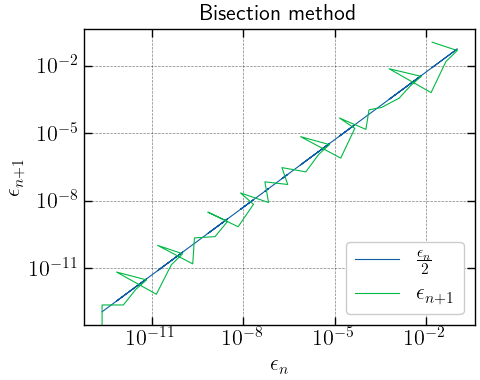

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

ax.plot(np.abs(error_n), np.abs(error_np1_predict), label = r"$\frac{\epsilon_{n}}{2}$")
ax.plot(np.abs(error_n), np.abs(error_np1), label = r"$\epsilon_{n+1}$")
ax.set_yscale("log") ; ax.set_xscale("log")
ax.set_xlabel(r"$\epsilon_{n}$") ; ax.set_ylabel(r"$\epsilon_{n+1}$") ; ax.set_title(r"Bisection method")
ax.legend(loc = "lower right") ; plt.rcParams["lines.linewidth"] = 0.8
plt.show()

In [11]:
# Μέθοδος γραμμικής παρεμβολής.

N = len(solution2)
error_n = np.array([solution2[N-1]-solution2[0]])
error_np1 = np.array([solution2[N-1]-solution2[1]])

for i in range(1, N-1):
    error_n = np.append(error_n, [solution2[N-1]-solution2[i]])
    error_np1 = np.append(error_np1, [solution2[N-1]-solution2[i+1]])

k = np.average(np.abs(error_np1) / (np.abs(error_n) ** 1.618))
error_np1_predict = k * (np.abs(error_n) ** 1.618)

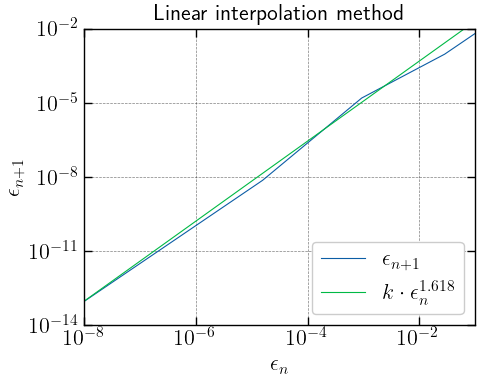

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

ax.plot(np.abs(error_n), np.abs(error_np1), label = r"$\epsilon_{n+1}$")
ax.plot(np.abs(error_n), np.abs(error_np1_predict), label = r"$k\cdot\epsilon_{n}^{1.618}$")
ax.set_yscale("log") ; ax.set_xscale("log")
ax.set_xlabel(r"$\epsilon_{n}$") ; ax.set_ylabel(r"$\epsilon_{n+1}$") ; ax.set_title(r"Linear interpolation method")
ax.legend(loc = "lower right") ; plt.rcParams["lines.linewidth"] = 0.8
ax.set_xlim(10**(-8), 10**(-1)), ax.set_ylim(10**(-14), 10**(-2))
plt.show()

In [13]:
# Μέθοδος Newton - Raphson.

def DDf1(x): return -48*np.sin(4*x) - np.exp(x) # second derivative

N = len(solution3)
root = solution3[N-1]

error_n = np.array([solution3[N-1]-solution3[0]])
error_np1 = np.array([solution3[N-1]-solution3[1]])

for i in range(1, N-1):
    error_n = np.append(error_n, [solution3[N-1]-solution3[i]])
    error_np1 = np.append(error_np1, [solution3[N-1]-solution3[i+1]])

error_np1_predict = (-DDf1(root)/Df1(root)) * (np.abs(error_n) ** 2)

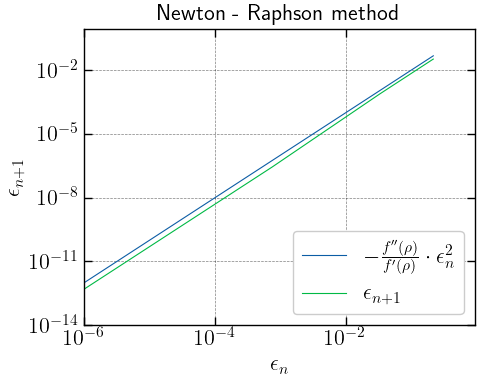

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

ax.plot(np.abs(error_n), np.abs(error_np1_predict), label=r"$-\frac{f''(\rho)}{f'(\rho)}\cdot\epsilon_{n}^{2}$")
ax.plot(np.abs(error_n), np.abs(error_np1), label=r"$\epsilon_{n+1}$")
ax.set_yscale("log") ; ax.set_xscale("log")
ax.set_xlabel(r"$\epsilon_{n}$") ; ax.set_ylabel(r"$\epsilon_{n+1}$") ; ax.set_title(r"Newton - Raphson method")
ax.legend(loc = "lower right") ; plt.rcParams["lines.linewidth"] = 0.8; ax.set_xlim(left=10**(-6)) ; ax.set_ylim(bottom=10**(-14))
plt.show()

### Άσκηση 2:
Δίνεται η εξίσωση,
$$3x+4cos\left(\frac{x}{4} \right)-2e^{\frac{x}{2}}=0$$

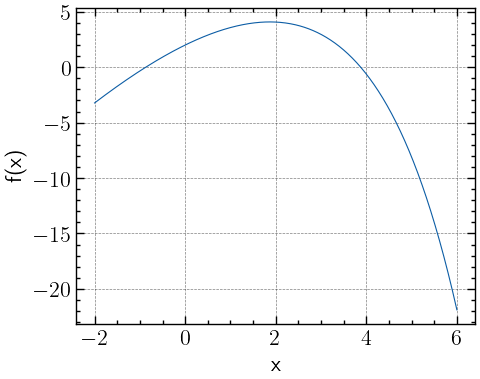

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

x = np.linspace(-2, 6, 500)

def f(x):
    return 3*x + 4*np.cos(x/4) -2*np.exp(x/2)

ax.plot(x, f(x))
ax.set_xlabel("x") ; ax.set_ylabel("f(x)") ; plt.rcParams["lines.linewidth"] = 0.8
plt.show()

Η μεγαλύτερη ρίζα φαίνεται να ανήκει εντός του διαστήματος $(3, 4)$.

α) Να διερευνήσετε την ύπαρξη κατάλληλων αναδρομικών σχέσεων με τη μέθοδο $x=g(x)$, ώστε να βρείτε τη μεγαλύτερη ρίζα. H μέθοδος περιγράφεται από την αναδρομική σχέση,
$$x_{n+1}=f\left(x_{n}\right),$$
και η συνθήκη σύγκλισης ως,
$$|g'(\rho)|<1\Leftrightarrow\epsilon_{n+1}=g'(\rho)\epsilon_{n}$$

Μπορούμε να λύσουμε ως προς τον όρο $e^{\frac{x}{2}}$, ώστε μετά από λογαρίθμηση να λάβουμε την εξίσωση,
$$x=g(x)=2\cdot ln\left(\frac{3x+4cos\left(\frac{x}{4}\right)}{2} \right),$$
με παράγωγο την,
$$g'(x)=\frac{4}{3x+4cos\left(\frac{x}{4} \right)}\cdot\left(3-sin\left(\frac{x}{4}\right)\right)$$
Ένα σύντομο plot αυτής της συνάρτησης στο διάστημα $(3, 4)$ δείχνει ότι πράγματι οι τιμές που λαμβάνει είναι μικρότερες της μονάδας.

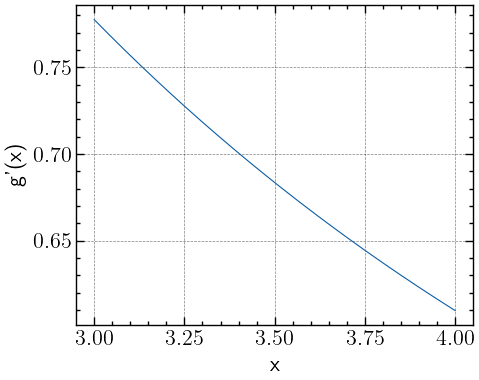

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

x = np.linspace(3, 4, 500)

def f(x):
    return (4 / (3*x + 4*np.cos(x/4))) * (3 - np.sin(x/4))

ax.plot(x, f(x))
ax.set_xlabel("x") ; ax.set_ylabel("g'(x)") ; plt.rcParams["lines.linewidth"] = 0.8
plt.show()

In [17]:
x = 3

iteration4 = []
solution4 = []

def g(x):
    return 2 * np.log((3*x + 4*np.cos(x/4)) / 2)

for i in range(0, 30):
    x = g(x)
    iteration4.append(i+1)
    solution4.append(x)
    print(str(iteration4[i]) + ". x=%.8f"%solution4[i])

1. x=3.57127411
2. x=3.77757569
3. x=3.84523377
4. x=3.86673388
5. x=3.87349811
6. x=3.87561954
7. x=3.87628422
8. x=3.87649241
9. x=3.87655762
10. x=3.87657804
11. x=3.87658443
12. x=3.87658643
13. x=3.87658706
14. x=3.87658726
15. x=3.87658732
16. x=3.87658734
17. x=3.87658734
18. x=3.87658735
19. x=3.87658735
20. x=3.87658735
21. x=3.87658735
22. x=3.87658735
23. x=3.87658735
24. x=3.87658735
25. x=3.87658735
26. x=3.87658735
27. x=3.87658735
28. x=3.87658735
29. x=3.87658735
30. x=3.87658735


β) Εφόσον βρείτε κατάλληλη σχέση, υπολογίστε των αριθμό των επαναλήψεων που απαιτούνται, ώστε η απόλυτη ακρίβεια να είναι της τάξης του $10^{-3}$, $10^{-6}$ και $10^{-12}$.

In [18]:
# Ακρίβεια 3 δεκαδικών ψηφίων.

N = len(solution4)
max_error = 10**(-3)

for i in range(0, len(solution4)):
    if np.abs(solution4[N - 1] - solution4[i]) < max_error:
        print("Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι " + str(i+1) + ".")
        break

Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι 6.


In [19]:
# Ακρίβεια 6 δεκαδικών ψηφίων.

N = len(solution4)
max_error = 10**(-6)

for i in range(0, len(solution4)):
    if np.abs(solution4[N - 1] - solution4[i]) < max_error:
        print("Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι " + str(i+1) + ".")
        break

Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι 12.


In [20]:
# Ακρίβεια 12 δεκαδικών ψηφίων.

N = len(solution4)
max_error = 10**(-12)

for i in range(0, len(solution4)):
    if np.abs(solution4[N - 1] - solution4[i]) < max_error:
        print("Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι " + str(i+1) + ".")
        break

Ο αριθμός των επαναλήψεων που χρειάστηκαν είναι 24.


### Άσκηση 3:
Ξεκινώντας από το αρχικό σηµείο $x_{0} = 1.2$, να ϐρεθεί ϱίζα της εξίσωσης,
$$(x-1)^{4}e^{x}=0,$$
µε την κανονική µέθοδο Newton-Raphson.

Η αναδρομική σχέση είναι και πάλι,
$$x_{n+1}=x_{n}-\frac{f\left(x_{n}\right)}{f'\left(x_{n}\right)}$$

In [21]:
x = 0.5
iteration6 = []
solution6 = []

def f3(x): return ((x - 1) ** 4) * np.exp(x)
def Df3(x): return 4 * ((x - 1) ** 3) * np.exp(x) + f3(x)

for i in range(0, 10):
    x = x - f3(x) / Df3(x)
    iteration6.append(i+1)
    solution6.append(x)
    print(str(iteration6[i]) + ". f(%.12f)"%solution6[i] + "=%.12f"%f3(solution6[i]))

1. f(0.642857142857)=0.030942627164
2. f(0.740896358543)=0.009454994198
3. f(0.810158807065)=0.002920177944
4. f(0.859983815036)=0.000908236991
5. f(0.896257590180)=0.000283834416
6. f(0.922883758347)=0.000088999332
7. f(0.942541807477)=0.000027973612
8. f(0.957115703032)=0.000008807715
9. f(0.967952964357)=0.000002776694
10. f(0.976029429963)=0.000000876189


α) Πόσες επαναλήψεις χρειάζονται για ακρίβεια $10^{-12}$;

In [22]:
x = 0.5
iteration6 = []
solution6 = []

for i in range(0, 100): # Περισσότερες επαναλήψεις.
    x = x - f3(x) / Df3(x)
    iteration6.append(i+1)
    solution6.append(x)

N = len(solution6)

for i in range(0, N):
    if np.abs(solution6[N-1] - solution6[i]) <= 10**(-12):
        print("Ο αριθμός των επαναλήψεων που χρειάστηκαν για ακρίβεια 12 δεκαδικών ψηφίων είναι " + str(i+1) + ".")
        break

Ο αριθμός των επαναλήψεων που χρειάστηκαν για ακρίβεια 12 δεκαδικών ψηφίων είναι 93.


β) Επαναλάβετε µε την παραλλαγή της µεθόδου που είναι πιο κατάλληλη στην περίπτωση πολλαπλών ϱιζών. Σχεδιάστε την εξάρτηση της διαφοράς,
$$x_{n+1}-x_{n}$$
ως συνάρτηση του αριθµού των επαναλήψεων για τις δύο παραλλαγές στο ίδιο σχήµα και σχολιάστε το αποτέλεσµα.

Η βελτίωση για πολλαπλές ρίζες αποδίδεται ως,
$$x_{n+1}=x_{n}-\frac{f\left(x_{n}\right)f'\left(x_{n}\right)}{\left[f'\left(x_{n}\right)\right]^{2}-f\left(x_{n}\right)f''\left(x_{n}\right)}$$

In [23]:
x = 0.5
iteration7 = []
solution7 = []

def DDf3(x): return 12 * ((x - 1) ** 2) * np.exp(x) + 2 * Df3(x)

for i in range(0, 5):
    x = x - (f3(x) * Df3(x)) / (Df3(x)**2 - f3(x)*DDf3(x))
    iteration7.append(i+1)
    solution7.append(x)
    print(str(iteration7[i]) + ". f(%.5f)"%solution7[i] + "=%.5f"%f3(solution7[i]))

1. f(0.96667)=0.00000
2. f(0.99973)=0.00000
3. f(1.00000)=0.00000
4. f(1.00000)=0.00000
5. f(1.00000)=0.00000


In [24]:
n1 = len(solution6)
n2 = len(solution7)
error_n1 = solution6[n1-1] - solution6
error_n2 = solution7[n2-1] - solution7

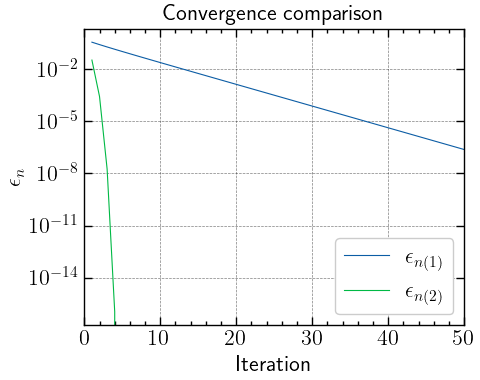

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

ax.plot(iteration6, np.abs(error_n1), label=r"$\epsilon_{n(1)}$")
ax.plot(iteration7,np.abs(error_n2), label=r"$\epsilon_{n(2)}$")
ax.set_yscale("log")
ax.set_xlabel(r"Iteration") ; ax.set_ylabel(r"$\epsilon_{n}$") ; ax.set_title(r"Convergence comparison")
ax.legend(loc = "lower right") ; plt.rcParams["lines.linewidth"] = 0.8 ; ax.set_xlim(left=0, right=50)
plt.show()

Φανερά, η βελτιωμένη μέθοδος συγκλίνει με πολύ λιγότερες επαναλήψεις.

### Άσκηση 4:

α) Βρείτε μία λύση του συστήματος,
$$y=2x-e^{x}+3,$$
$$y=0.5x-2x^{3},$$
με τη μέθοδο Newton - Raphson.

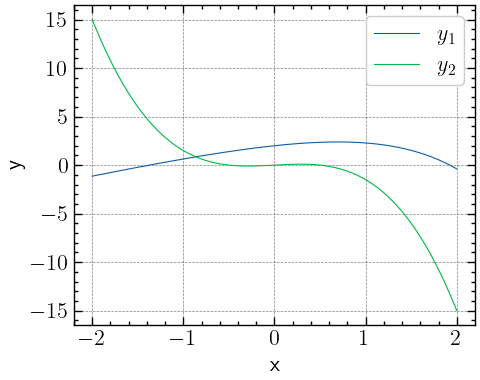

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

x = np.linspace(-2, 2, 500)

def f4(x):
    return 2*x -np.exp(x) + 3
def f5(x):
    return 0.5*x - 2*x**3

ax.plot(x, f4(x), label=r"$y_{1}$")
ax.plot(x, f5(x), label=r"$y_{2}$")
ax.set_xlabel("x") ; ax.set_ylabel("y") ; plt.rcParams["lines.linewidth"] = 0.8  ; ax.legend(loc = "upper right")
plt.show()

Μπορεί να θεωρηθεί ως σημείο αναφοράς το $(x_{0},y_{0})=(-0.5,0.5)$.

Οι αναδρομικές σχέσεις είναι, πλέον,
$$x_{n+1}=x_{n}-\frac{f\cdot g_{y}-g\cdot f_{y}}{f_{x}\cdot g_{y}-g_{x}\cdot f_{y}},$$
$$y_{n+1}=y_{n}-\frac{g\cdot f_{x}-f\cdot g_{x}}{f_{x}\cdot g_{y}-g_{x}\cdot f_{y}}$$

In [27]:
x = -0.5 ; y = 0.5

def f(x, y): return y - 2*x +np.exp(x) - 3
def g(x, y): return y - 0.5*x +2*x**3
def fx(x, y): return -2 + np.exp(x)
def fy(x, y): return 1
def gx(x, y): return -0.5 + 6*x**2
def gy(x, y): return 1

for i in range(0, 10):
    xnew = x - (f(x, y)*gy(x, y) - g(x, y)*fy(x,y)) / (fx(x, y)*gy(x, y) - gx(x,y)*fy(x, y))
    ynew = y - (g(x, y)*fx(x, y) - f(x, y)*gx(x,y)) / (fx(x, y)*gy(x, y) - gx(x,y)*fy(x, y))
    x = xnew 
    y = ynew
    print(str(i+1) + ". x = %.12f"%x + " y = %.12f"%y)

1. x = -1.082196444647 y = 0.582196444647
2. x = -0.899372327973 y = 0.800454869976
3. x = -0.863916402424 y = 0.850917908394
4. x = -0.862665035560 y = 0.852634417318
5. x = -0.862663512375 y = 0.852636490688
6. x = -0.862663512373 y = 0.852636490691
7. x = -0.862663512373 y = 0.852636490691
8. x = -0.862663512373 y = 0.852636490691
9. x = -0.862663512373 y = 0.852636490691
10. x = -0.862663512373 y = 0.852636490691


β) ∆ιερευνείστε την πιθανή εύρεση της παραπάνω λύσης µε τη µέθοδο $x = g(x)$ για συστήµατα.

Οι αναδρομικές σχέσεις που αντιστοιχούν σε αυτή τη μέθοδο θα αποδίδονται ως,
$$x_{n+1}=f_{1}\left(x_{n},y_{n}\right),$$
$$y_{n+1}=f_{2}\left(x_{n},y_{n}\right),$$
ενώ θα πρέπει να ικανοποιούνται και οι συνθήκες σύγκλισης,
$$\left|\frac{\partial f_{1}}{\partial x}\right|+\left|\frac{\partial f_{1}}{\partial y}\right|<1,$$
$$\left|\frac{\partial f_{2}}{\partial x}\right|+\left|\frac{\partial f_{2}}{\partial y}\right|<1$$

Μετά από αρκετές πράξεις, μπορούμε να μετασχηματίσουμε το αρχικό σύστημα στη μορφή,
$$x=f_{1}(x)=\frac{1}{2}\cdot\left(\frac{5x}{4}+\frac{e^{x}}{2}-\frac{3}{2}-x^{3}\right),$$
$$y=f_{2}(x)=\frac{4.5x-2e^{x}-2x^{3}+6}{3},$$
το οποίο ανάγεται εντέλει σε μονοδιάστατο πρόβλημα. Οι παράγωγοι των δύο συναρτήσεων δίνονται από τις σχέσεις,
$$f_{1}'(x)=\frac{1}{2}\cdot\left(\frac{5}{4}+\frac{e^{x}}{2}-3x^{2}\right),$$
$$f_{2}'(x)=\frac{1}{3}\cdot\left(4.5-2e^{x}-6x^{2}\right)$$
Ένα σύντομο plot των δύο δείχνει ότι και οι δύο ικανοποιούν το κριτήριο σύγκλισης στο διάστημα $(-1,-0.5)$ το οποίο μας ενδιαφέρει, οπότε μπορούμε να θεωρήσουμε και πάλι ως σημείο αναφοράς το $(x_{0},y_{0})=(-0.5,0.5)$.

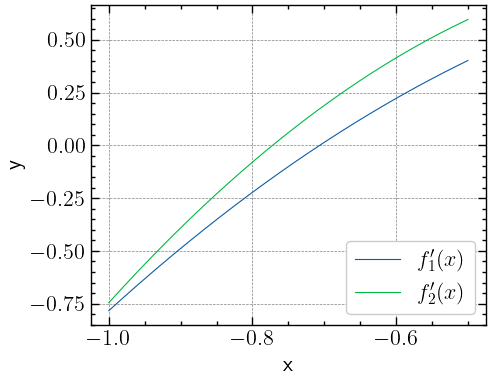

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4), tight_layout=True)

x = np.linspace(-1, -0.5, 500)

def f6(x):
    return 0.5 * (1.25 + 0.5*np.exp(x) - 3*x**2)
def f7(x):
    return (1/3) * (4.5 - 2*np.exp(x) - 6*x**2)

ax.plot(x, f6(x), label=r"$f_{1}'(x)$")
ax.plot(x, f7(x), label=r"$f_{2}'(x)$")
ax.set_xlabel("x") ; ax.set_ylabel("y") ; plt.rcParams["lines.linewidth"] = 0.8  ; ax.legend(loc = "lower right")
plt.show()

In [29]:
x = -0.5 ; y = 0.5
iteration = []
solution_x = []
solution_y = []

def f1(x): return 0.5 * (5*x/4 + np.exp(x)/2 - 1.5 - x**3)
def f2(x): return (4.5*x - 2*np.exp(x) - 2*x**3 + 6) / 3

for i in range(0, 20):
    xnew = f1(x)
    ynew = f2(x)
    x = xnew 
    y = ynew
    iteration.append(i+1)
    solution_x.append(x)
    solution_y.append(y)
    print(str(iteration[i]) + ". = %.12f"%solution_x[i] + ", y=%.12f"%solution_y[i])

1. = -0.848367335072, y=0.928979560192
2. = -0.867904756757, y=0.849102106990
3. = -0.860604514255, y=0.854093868254
4. = -0.863452113742, y=0.852087820063
5. = -0.862358453186, y=0.852850189381
6. = -0.862781070771, y=0.852554353205
7. = -0.862618142860, y=0.852668222127
8. = -0.862681011952, y=0.852624256237
9. = -0.862656761089, y=0.852641211413
10. = -0.862666116778, y=0.852634669710
11. = -0.862662507654, y=0.852637193199
12. = -0.862663899966, y=0.852636219685
13. = -0.862663362850, y=0.852636595238
14. = -0.862663570055, y=0.852636450359
15. = -0.862663490121, y=0.852636506250
16. = -0.862663520958, y=0.852636484689
17. = -0.862663509062, y=0.852636493006
18. = -0.862663513651, y=0.852636489797
19. = -0.862663511880, y=0.852636491035
20. = -0.862663512563, y=0.852636490558
